In [24]:
##Importing Package
import numpy as np # The fundamental package for scientific computing with Python.
import time # for timming process
import pyplume as pl # importing pyplume and naming it at pl
import matplotlib.pyplot as plt

In [25]:
# Folder path and Name of the data
folder = r"Z:\Jesse\Plumes\CarbonDioxide\Neutral\co2.h2pt5.a"
filename = "CO2_h5" # nbl_helium_h20_T.mat

In [26]:
# path = r'C:\Users\thanh\OneDrive - University of Texas at San Antonio\pyplume TEST\namelist.input.txt'
inputname = 'namelist.input.txt'
inputpath = folder+'//'+inputname
p1_metadata = pl.plume_metadata(inputpath)
nx = p1_metadata.nx_trimmed
ny = p1_metadata.ny_trimmed
nz = p1_metadata.nz_trimmed
dx = p1_metadata.dx
dy = p1_metadata.dy
dz = p1_metadata.dz
D  = p1_metadata.D
dt = p1_metadata.dt
Ta = p1_metadata.Ta
g  = p1_metadata.g
nu  = p1_metadata.nu
threshold = p1_metadata.threshold
density_ref = p1_metadata.density_ref
density_amb = p1_metadata.density_amb

In [27]:
print(threshold)

0.001


In [28]:
#LOADING DATA T and UVW data
name = folder+"\\"+filename
T = pl.loadmat(name+"_T")
# U = lp.loadmat(name+"_U")
# V = lp.loadmat(name+"_V")
# W = pl.loadmat(name+"_W")
# Q = pl.loadmat(name+"_Q")

In [29]:
#Double Check Data
np.shape(T)

(45, 45, 700, 541)

In [99]:
co2_plume = pl.plume_metrics(T,T,T,dx,dy,dz,dt,D,threshold,Ta,g,density_ref,density_amb)

In [95]:
def plumeradius_timeaverage(data,threshold,dx,D):
    nx,ny,nz,nt = np.shape(data)
    data = data/np.max(data)
    data[data<threshold] = 0
    data = np.mean(data,3)
    data = np.mean(data,1)
#     data = data[:,22,:]
#     mid = int((nx+1)*0.5)
#     radius = np.zeros(nz)
#     for k in range(0,nz):
#         for i in range (mid,nx):
#             if(data[i,k]<0):
#                 break
#             radius[k] = (i-mid+1)*dx/D;
#         for i in range (0,mid):
#             if(data[i,k]>threshold):
#                 break
#             if (((mid-i+1)*dx/D) > radius[k]):
#                 radius[k] = (mid-i+1)*dx/D;
# #             print(radius[k])
    
#     a = data
#     sizea = int((nx+1)*0.5)
#     b = a[0:sizea][::-1]
#     c = a[sizea-1:nx]
#     d = (b+c)*0.5
#     radius = np.zeros(nz)
#     for z in range(nz):
#         for r in range(sizea):
#             if(d[r,z]>threshold):
#                 radius[z] = (r+1)*dx/D               
#     radius =  radius
    return data

data = plumeradius_timeaverage(co2_plume.gT,threshold,dx,D)

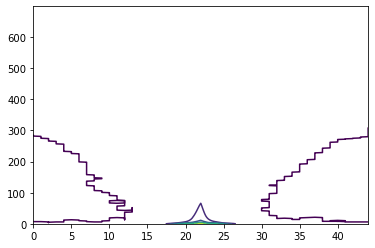

In [96]:
plt.contour(data.T)

In [100]:
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
 
# Dataset
x = np.linspace(0,nz,nz)
y = data
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 50)
Y_ = X_Y_Spline(X_)
plt.plot(Y_, X_)
# plt.plot(x, y)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [120]:
def frontplot(data,dataname,dt,marksize=500):
    from scipy.interpolate import make_interp_spline
    plt.figure(figsize=(10,5))
    color = 'k'
    nt = np.shape(data)[0]
    x = list(range(0,(nt)*dt,dt))
    x = np.array(x)
    x = x[0:np.shape(data)[0]]
    y = data
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 50)
    Y_ = X_Y_Spline(X_)
    
    plt.plot(X_,Y_,color = color)
    plt.locator_params(axis='x', nbins=500)
    plt.grid()
    plt.xticks(np.arange(min(x), max(x)+1, marksize))
    plt.ylabel('Wf/D');plt.xlabel('Time (s)')
#     plt.savefig(dataname +' Front.png')

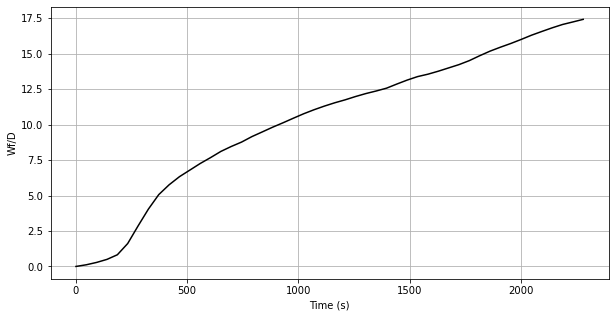

In [122]:
data = co2_plume.front_height

#plot front velocity
frontplot(data,filename+"_height",dt=10,marksize=500)

In [ ]:
# def frontplot(data,dataname,dt,marksize=500):
#     plt.figure(figsize=(10,5))
#     color = 'k'
#     nt = np.shape(data)[0]
#     x = list(range(0,(nt)*dt,dt))
#     plt.plot(x[0:np.shape(data)[0]],data,color = color)
#     plt.locator_params(axis='x', nbins=500)
#     plt.grid()
#     plt.xticks(np.arange(min(x), max(x)+1, marksize))
#     plt.ylabel('Wf/D');plt.xlabel('Time (s)')
#     plt.savefig(dataname +' Front.png')

In [ ]:
def plumehalfgraph(dataw,datat,name,threshold=0.36788,dx=40,dy=40,dz=10,D=400):
# def plumehalfgraph(dataw,datat,threshold,name,dx,dy,dz,D):
    import matplotlib.pyplot as plt
    if (sameshape2(dataw,datat) is False):
        return
    nx,ny,nz,nt = shape(datat)
    wmean = timemean(dataw)
    tmean = timemean(datat)
    wc = centermean(dataw)
    tc = centermean(datat)
    
    lt = np.zeros((nz,1),dtype=np.float32)
    zt = np.zeros((nz,1),dtype=np.float32)
    
    x = np.arange(-((nx/2)-1)*dx-(dx/2),(nx/2)*dx,dx)
    y = x
    z = np.arange(0,nz*dz,dz)
    [X,Y,Z] = np.meshgrid(x,y,z);
    
    a = np.int(np.ceil(ny/2))
    b = np.int(np.floor(ny/2))
    if(a==b): #even
        cy=a-1
    else:     #odd
        cy=b
    
    for zi in range(0,nz):
        if (tmean[nx-1,cy,zi]) >= (threshold*tc[zi]):
            lt[zi] = x[nx-1]
        else:
            for xi in range(cy,ny):
                if (tmean[xi,cy,zi]) >= (threshold*tc[zi]):
                    c = (tmean[xi,cy,zi] - (threshold*tc[zi]))/(tmean[xi,cy,zi]-tmean[(xi+1),cy,zi])
                    lt[zi] = x[xi] +c*dx;         

    tmeandls = np.zeros(nx*ny*nz,dtype = np.float32)
    tmeandls = np.reshape(tmeandls, (nx,ny,nz))
    xdlst = np.zeros(nx*nz,dtype = np.float32)
    xdlst = np.reshape(xdlst, (ny,nz))
    ydlst = xdlst
    for zi in range(0,nz):
        tmeandls[:,:,zi] = (tmean[:,:,zi]/tc[zi])
        if (lt[zi]!=0):
            xdlst[:,zi] = x[:]/lt[zi]
            ydlst[:,zi] = y[:]/lt[zi]

    graphxt = []
    graphyt = []
    for i in range(0,len(lt)):
        if (lt[i] != 0):
            graphxt = np.append(graphxt, ((i+1)*dz/D))
            graphyt = np.append(graphyt,lt[i]/D)

    graphxt = np.reshape(graphxt, (len(graphxt), 1))
    graphyt = np.reshape(graphyt, (len(graphyt), 1))

    lw = np.zeros((nz,1),dtype=np.float32)
    zw = np.zeros((nz,1),dtype=np.float32)
    for zi in range(0,nz):
        if (wmean[nx-1,cy,zi]) >= (threshold*wc[zi]):
            lw[zi] = x[nx-1]
        else:
            for xi in range(cy,nx):
                if (wmean[xi,cy,zi]) >= (threshold*wc[zi]):
                    c = (wmean[xi,cy,zi] - (threshold*wc[zi]))/(wmean[xi,cy,zi]-wmean[(xi+1),cy,zi])
                    lw[zi] = x[xi] +c*dx;         
    wmeandls = np.zeros(nx*ny*nz,dtype = np.float32)
    wmeandls = np.reshape(wmeandls, (nx,ny,nz))
    xdlsw = np.zeros(nx*nz,dtype = np.float32)
    xdlsw = np.reshape(xdlsw, (ny,nz))
    ydlsw = xdlsw
    for zi in range(0,nz):
        wmeandls[:,:,zi] = (wmean[:,:,zi]/wc[zi])
        if (lw[zi]!=0):
            xdlsw[:,zi] = x[:]/lw[zi]
            ydlsw[:,zi] = y[:]/lw[zi]

    graphxw = []
    graphyw = []
    for i in range(0,len(lw)):
        if (lw[i] != 0):
            graphxw = np.append(graphxw, ((i+1)*dz/D))
            graphyw = np.append(graphyw,lw[i]/D)

    graphxw = np.reshape(graphxw, (len(graphxw), 1))
    graphyw = np.reshape(graphyw, (len(graphyw), 1))
    plt.figure(figsize=(10,10))
    plt.ylabel('Z/D')
    plt.xlabel('halfwidth')
#     plt.title(name + 'plume-half graph')# giving a title to my graph
    plt.plot(graphyt, graphxt,label='Tmean')
    plt.plot(graphyw, graphxw,label='Wmean')
    plt.legend()
    plt.savefig(name+'.jpg')
    plt.show()
    return

In [ ]:
# Half-Plume Plot
lp.plumehalfgraph(W,T,filename,threshold,dx,dy,dz,D)

In [ ]:
#PROCESSING DATA (VORTEX IDENTIFICATION CRITERIONS) There are 3 of them. Lambda2 take very long time.

omega = lp.omega(U,V,W,dx,dy,dz) 
# helicity = lp.helicity(U,V,W,dx,dy,dz)
# lambda2 = lp.lambda2multicore(U,V,W,dx,dy,dz) #take long time


In [ ]:
#Save Vortex ID Data 
lp.savemat(omega,filename+"VortexID")

In [ ]:
# #PRE-PROCESSING DATA (PLUMHALFGRAPH)
# # Estimated time: ~1 minutes
# # Input (u,v,w,threshold,dx,dy,dz,D,graphname)
# threshold = 1/np.exp(1) #input threshold
# lp.plumehalfgraph(dataw,datat,name,threshold,dx,dy,dz,D)